In [40]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())
initial_sentences=df['review']
sentences = df['review'].values
y = df['label'].values




   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [41]:
sentences

array(["Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.",
       "This is an example of why the majority of action films are the same. Generic and 

In [42]:
y

array(['neg', 'neg', 'neg', ..., 'unsup', 'unsup', 'unsup'], dtype=object)

In [43]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)


In [44]:
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [7]:
sentences

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [106]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [107]:
import numpy as np

In [108]:
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [88]:
model = Sequential()
model.add(layers.Dense(300,input_dim=np.prod(X_train.shape[1:]), activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 7s 24ms/step - loss: 0.8797 - acc: 0.5038 - val_loss: 0.8420 - val_acc: 0.5133
Epoch 2/5
293/293 [==============================] - 6s 20ms/step - loss: 0.7937 - acc: 0.5727 - val_loss: 0.8435 - val_acc: 0.5121
Epoch 3/5
293/293 [==============================] - 5s 18ms/step - loss: 0.6911 - acc: 0.6755 - val_loss: 0.8696 - val_acc: 0.5179
Epoch 4/5
293/293 [==============================] - 5s 18ms/step - loss: 0.5010 - acc: 0.8132 - val_loss: 0.9584 - val_acc: 0.5083
Epoch 5/5
293/293 [==============================] - 5s 17ms/step - loss: 0.2928 - acc: 0.9225 - val_loss: 1.0602 - val_acc: 0.5014


In [90]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [18]:
import matplotlib.pyplot as plt

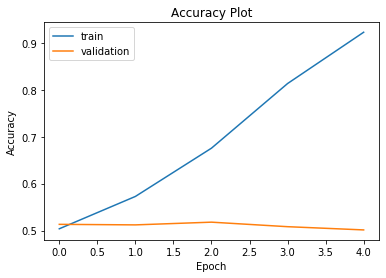

In [93]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

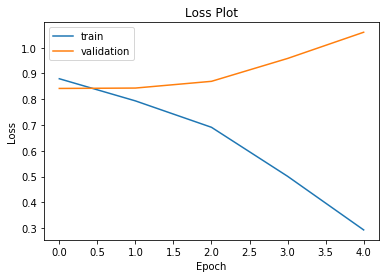

In [94]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [45]:
from keras.preprocessing.sequence import pad_sequences


In [46]:
max_review_len= max([len(s.split()) for s in initial_sentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(initial_sentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)


In [47]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)

176408
2470


In [48]:
from keras.layers import Embedding, Flatten

In [49]:
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 205s 700ms/step - loss: 1.0184 - acc: 0.4930 - val_loss: 0.8543 - val_acc: 0.4945
Epoch 2/5
293/293 [==============================] - 210s 715ms/step - loss: 0.7958 - acc: 0.5727 - val_loss: 0.8579 - val_acc: 0.4964
Epoch 3/5
293/293 [==============================] - 207s 708ms/step - loss: 0.6647 - acc: 0.6853 - val_loss: 0.9511 - val_acc: 0.4905
Epoch 4/5
293/293 [==============================] - 212s 725ms/step - loss: 0.4901 - acc: 0.7907 - val_loss: 1.1221 - val_acc: 0.4779
Epoch 5/5
293/293 [==============================] - 210s 717ms/step - loss: 0.3392 - acc: 0.8693 - val_loss: 1.4345 - val_acc: 0.4788


In [15]:
print(history1.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


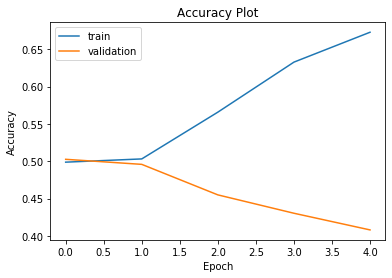

In [19]:

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

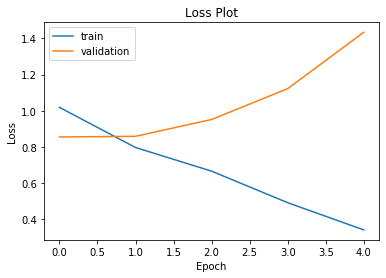

In [50]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()